# 442 Poisson Fit

In [1]:
#Import ueful librarie and functions to use in your analysis
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
data=[4,
9,
6,
7,
7,
4,
6,
2,
10,
8,
3,
8,
10,
11,
7,
10,
4,
4,
9,
7,
7,
10,
10,
5,
4,
6,
6,
5,
5,
7,
4,
9,
3,
7,
10,
3,
8,
1,
6,
6,
7,
4,
8,
4,
13,
7,
10,
7,
8,
9,
9,
6,
3,
7,
4,
3,
4,
7,
10,
2,
7,
3,
10,
7,
8,
2,
6,
5,
8,
6,
6,
7,
3,
5,
10,
5,
9,
4,
8,
8,
4,
8,
8,
9,
9,
6,
8,
5,
6,
8,
8,
11,
4,
4,
3,
8,
7,
4,
10,
10]

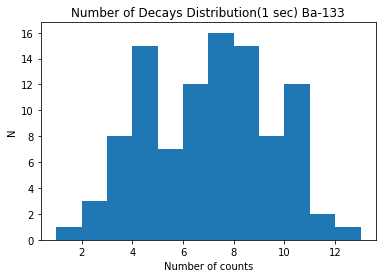

In [27]:
#Plot the histogram of your data with a given bin number (here 12)
plt.figure()
plt.hist(data,12)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Number of Decays Distribution(1 sec) Ba-133")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).


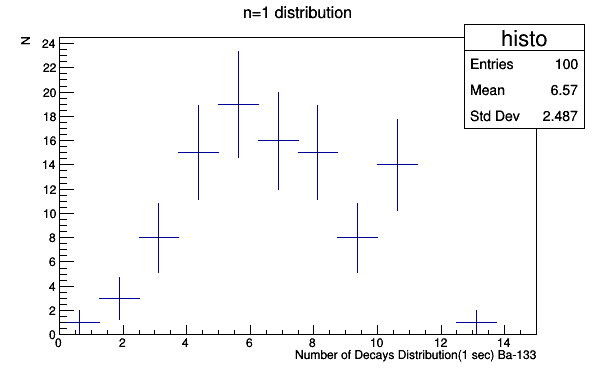

In [32]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "n=1 distribution",12,0,15) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis().SetTitle ("Number of Decays Distribution(1 sec) Ba-133");

#Fill the randomly generated data into your histogram
for data_point in data:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()

 FCN=6.06624 FROM MINOS     STATUS=SUCCESSFUL     29 CALLS         107 TOTAL
                     EDM=1.971e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.21939e+02   1.26450e+01   4.44330e-02  -2.74430e-07
   2  p1           6.73889e+00   3.18427e-01   3.18427e-01  -1.48413e-05


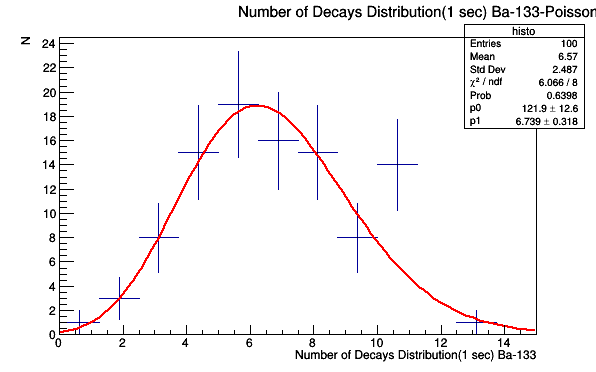

In [30]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",0,15) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(100, 10) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of Decays Distribution(1 sec) Ba-133-Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()

 FCN=6.78867 FROM MINOS     STATUS=SUCCESSFUL     47 CALLS         190 TOTAL
                     EDM=7.63596e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.79340e+01   2.31553e+00   3.22011e-03  -5.85326e-04
   2  Mean         6.68980e+00   3.36591e-01  -1.20922e-03  -1.56802e-03
   3  Sigma        2.69850e+00   2.56351e-01   2.56351e-01   3.13085e-02


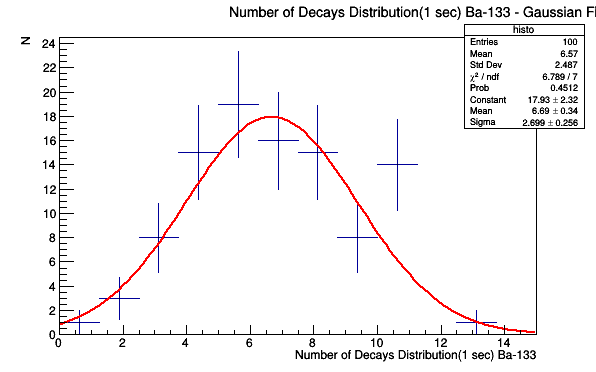

In [31]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 100, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of Decays Distribution(1 sec) Ba-133 - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")